# **Logistic Regression** **-** **case study**



In [ ]:
import warnings
warnings. filterwarnings( "ignore" )
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
f1_score,
accuracy_score,
recall_score,
precision_score,
confusion_matrix,
roc_auc_score,
ConfusionMatrixDisplay,
precision_recall_curve,
roc_curve,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

who = pd.read_csv("/content/drive/My Drive/whodata.csv")
data = who.copy()

Mounted at /content/drive


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


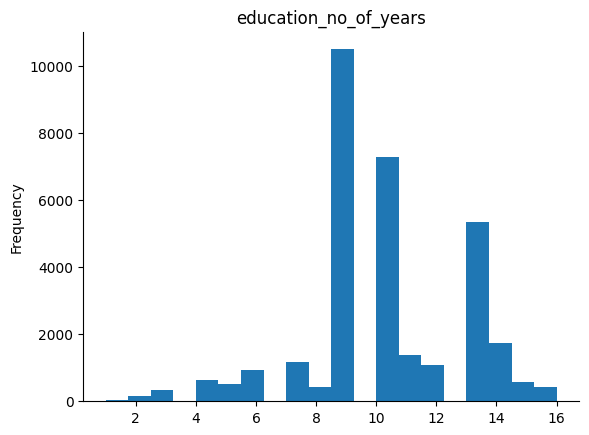

In [ ]:
from matplotlib import pyplot as plt
data['education_no_of_years'].plot(kind='hist', bins=20, title='education_no_of_years')
plt.gca().spines[['top', 'right',]].set_visible(False)

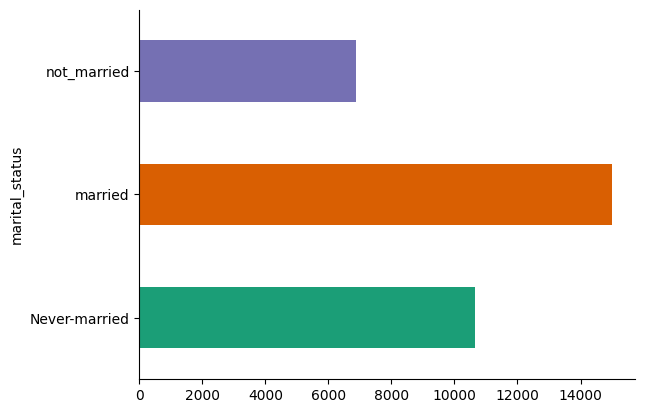

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('marital_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

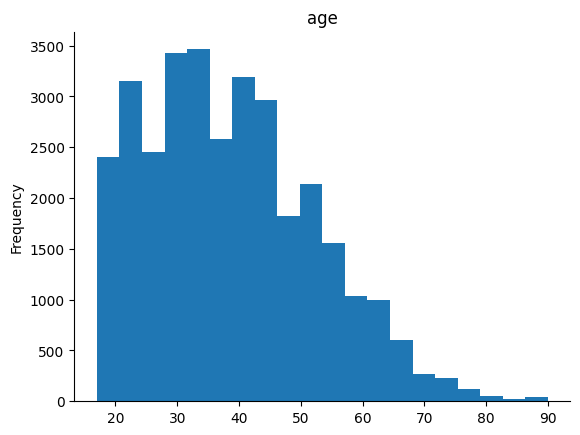

In [ ]:

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


In [ ]:
data.shape

(32531, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_no_of_years,0
marital_status,0
occupation,0
race,0
sex,0
capital_gain,0


In [ ]:
data.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32531.000000,3.253100e+04,32531.000000,32531.000000,32531.000000,32531.000000
mean,38.588362,1.897882e+05,10.081953,1078.642649,87.384341,40.441025
std,13.637644,1.055642e+05,2.571842,7388.624210,403.137260,12.347506
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370190e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

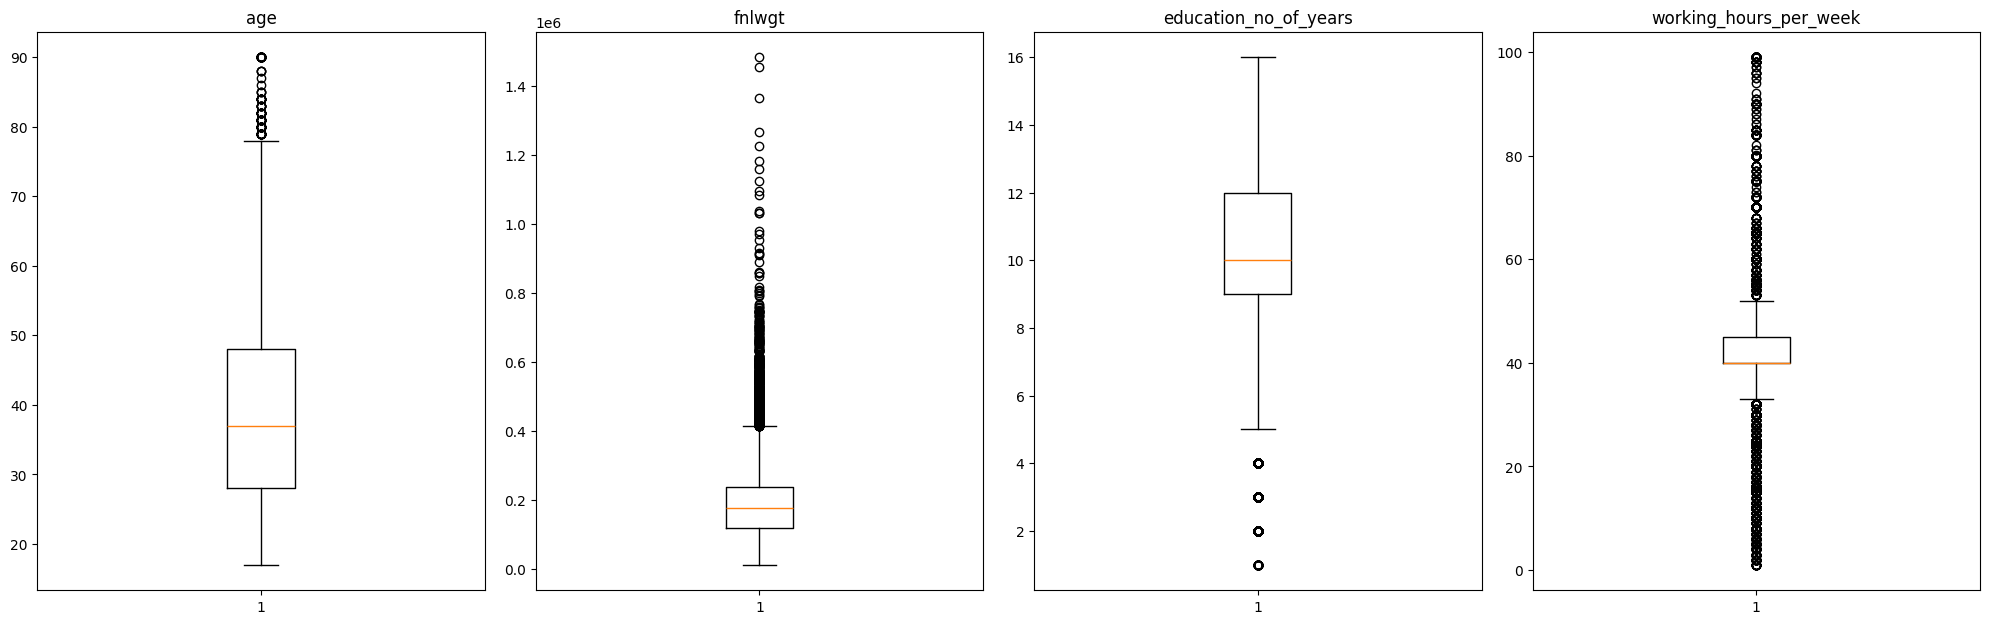

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
  plt.subplot(5, 4, i + 1)
  plt.boxplot(data[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

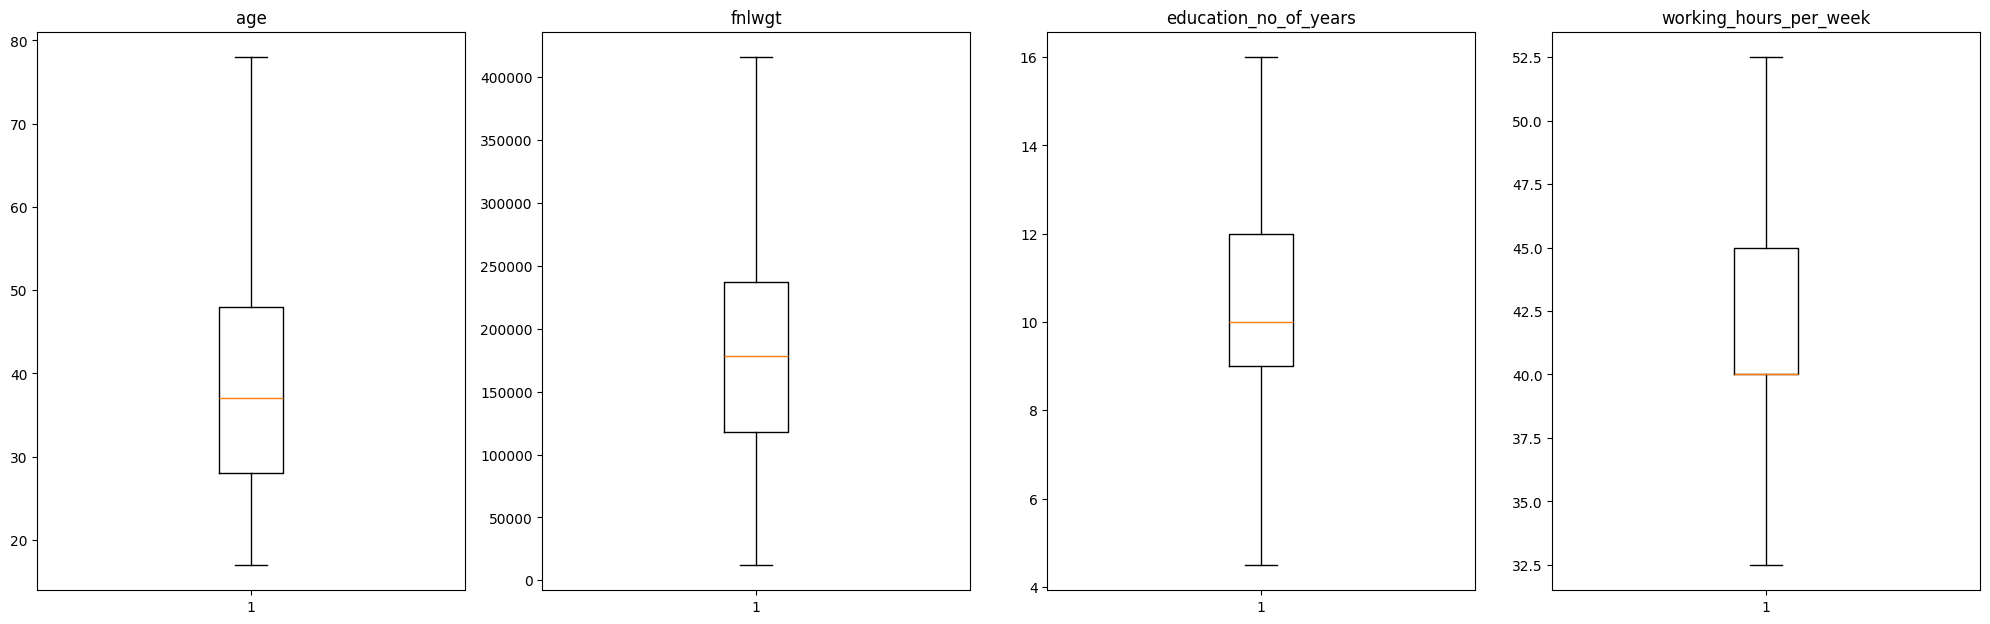

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def treat_outliers(df, col):
    """
    Treats outliers in a specified column of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        col (str): The name of the column to treat.

    Returns:
        pd.DataFrame: The DataFrame with outliers treated.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # Replace outliers with the nearest whisker value
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

def treat_outliers_all(df, col_list):
    """
    Treats outliers in multiple columns of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        col_list (list): A list of column names to treat.

    Returns:
        pd.DataFrame: The DataFrame with outliers treated in the specified columns.
    """
    for c in col_list:
        df = treat_outliers(df, c)
    return df

numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

In [ ]:
X = data.drop(["salary"], axis=1)
Y = data["salary"]
X = sm.add_constant(X)
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.30, random_state=1
)

In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit. fit(disp=False)

print (lg.summary())


                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.3678
Time:                        07:14:57   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.5200   2.75e+05   3.46e-05      1.000   -5.39e+05     5.4e+05
age                                -0.0314      0.002    -17.126    

In [ ]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5):
    """
    Calculates and returns performance metrics for a classification model.

    Args:
        model: classifier
        predictors: independent variables
        target: dependent variable
        threshold: threshold for classifying the observation as class 1
                (default is 0.5)

    Returns:
        pd.DataFrame: A DataFrame containing the performance metrics
                      (Accuracy, Recall, Precision, F1).
    """
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)  # Corrected f1_score typo


    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)


Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


In [ ]:
vif_series = pd.Series(
[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
index=X_train.columns,
dtype=float,

)

print("Series before feature selection: \n\n{}\n".format(vif_series))



Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked                   inf
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                        inf
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [ ]:
X_train1 = X_train.drop("occupation_Unknown", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
index=X_train1.columns,

)

print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked              1.012785
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                   3.039325
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [ ]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)

vif_series3 = pd.Series(
[variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
index=X_train2.columns,

)

print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                              326.271888
age                                  1.531401
fnlwgt                               1.037491
working_hours_per_week               1.237162
workclass_Local-gov                  3.041470
workclass_Never-worked               1.012785
workclass_Private                    7.717533
workclass_Self-emp-inc               2.217152
workclass_Self-emp-not-inc           3.487046
workclass_State-gov                  2.317984
workclass_Unknown                    3.039325
workclass_Without-pay                1.015562
education_11th                       2.147415
education_12th                       1.422410
education_1st-4th                    1.188352
education_5th-6th                    1.338683
education_7th-8th                    1.655272
education_9th                        1.524978
education_Assoc-acdm                 2.105382
education_Assoc-voc                  2.374490
education_Bachelors                  5.939193

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


In [ ]:
print (lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.3678
Time:                        07:15:22   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.3433      0.405     20.584      0.000       7.549       9.138
age                                -0.0314      0.002    -17.126    

In [ ]:
cols = X_train2.columns.tolist()


max_p_value = 1

while len(cols) > 0:
# defining the train set
  X_train_aux = X_train2[cols]

# fitting the model
  model = sm.Logit(y_train, X_train_aux).fit(disp=False)

# getting the p-values and the maximum p-value
  p_values = model.pvalues

  max_p_value = max(p_values)
  feature_with_p_max = p_values.idxmax()
  if max_p_value > 0.05:
    cols.remove(feature_with_p_max)
  else:
    break




In [ ]:
selected_features = cols
print (selected_features)


['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_1st-4th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'race_Other', 'race_White', 'native_contienent_other', 'native_contienent_south_america']


In [ ]:
X_train3 = X_train2[selected_features ]
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)
print (lg3.summary())


                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22735
Method:                           MLE   Df Model:                           35
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                  0.3666
Time:                        07:15:55   Log-Likelihood:                -7980.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.0557      0.233     34.544      0.000       7.599       8.513
age                                -0.0314      0.002    -17.178    

In [ ]:
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100
pd.set_option("display.max_columns", None)
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T


,const,age,fnlwgt,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_married,marital_status_not_married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,race_Other,race_White,native_contienent_other,native_contienent_south_america
Odds,3151.769230,0.969130,0.999999,0.937106,1.840620,1.431156,2.228214,2.180033,2.968489,4.947805,1.852163,1.809587,0.277548,0.254854,0.137414,0.054548,0.458036,0.092492,0.043336,0.341689,0.075834,0.674683,0.489944,2.887110,2.215304,1.468939,2.656708,11.291126,0.620316,0.577698,0.855304,0.532832,1.976960,0.856834,1.573320,3.524735
Change_odd%,315076.922967,-3.086978,-0.000063,-6.289395,84.062005,43.115618,122.821364,118.003275,196.848948,394.780514,85.216306,80.958691,-72.245187,-74.514571,-86.258563,-94.545220,-54.196379,-90.750752,-95.666411,-65.831123,-92.416624,-32.531684,-51.005637,188.710981,121.530367,46.893899,165.670835,1029.112563,-37.968373,-42.230185,-14.469579,-46.716755,97.696049,-14.316591,57.332018,252.473541


In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg3, X_train3, y_train)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835536,0.924048,0.867602,0.894936


In [ ]:
X_test3 = X_test[list(X_train3.columns) ]

log_reg_model_test_perf = model_performance_classification_statsmodels(lg3, X_test3, y_test)

print("Test performance:")
log_reg_model_test_perf


Test performance:


,Accuracy,Recall,Precision,F1
0,0.830635,0.917239,0.867838,0.891855


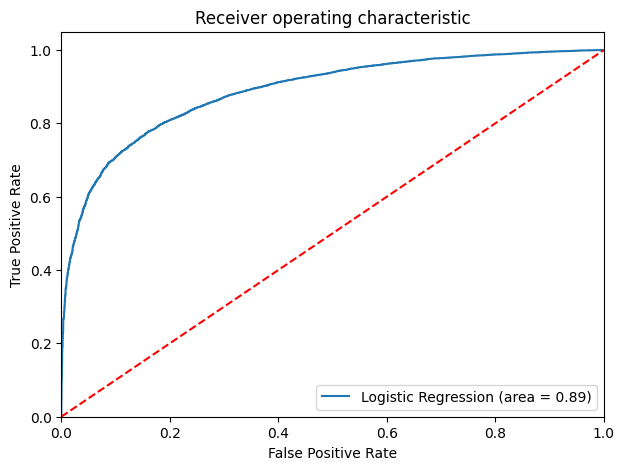

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print (optimal_threshold_auc_roc)


0.7579399407330087


In [ ]:
# checking model performance for this model

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc)

print("Training performance:")

log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792499,0.777301,0.938383,0.85028


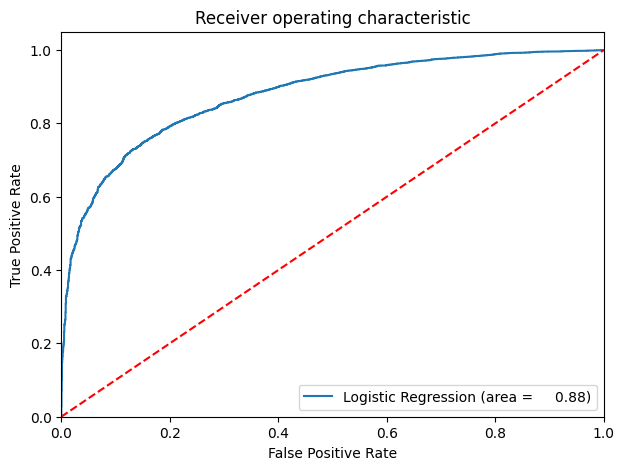

In [ ]:
#Checking model performance on test set

logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))

plt.plot(fpr, tpr, label="Logistic Regression (area = %8.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")

plt.show()


In [ ]:
# checking model performance for this model

log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

print("Test performance:")

log_reg_model_test_perf_threshold_auc_roc


Test performance:


,Accuracy,Recall,Precision,F1
0,0.783299,0.771901,0.931774,0.844336


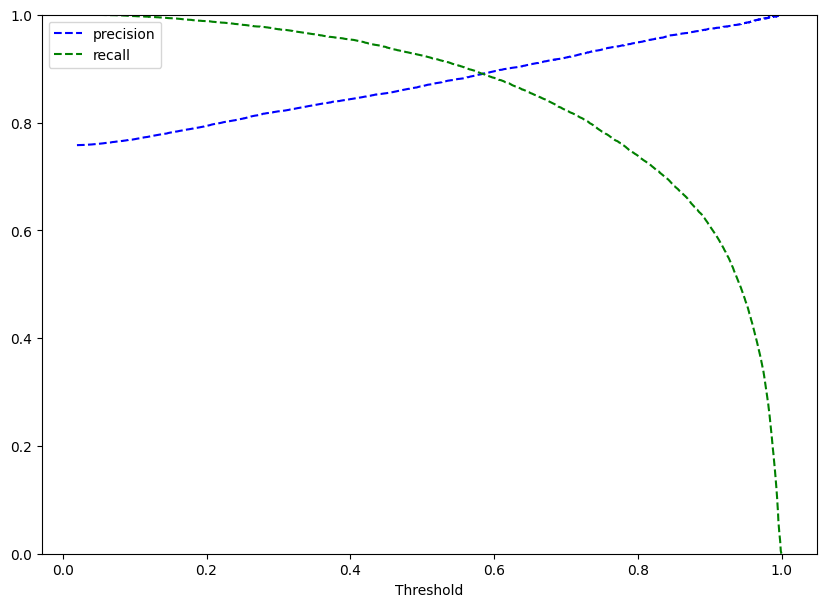

In [ ]:
#Precision-Recall Curve

y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):

  plt.plot(thresholds, precisions[:-1], "b--", label="precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()


In [ ]:
# setting the threshold

optimal_threshold_curve = 0.58


In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

print("Training performance:")
log_reg_model_train_perf_threshold_curve


Training performance:


,Accuracy,Recall,Precision,F1
0,0.833999,0.892301,0.889107,0.890701


In [ ]:
#Checking model performance on test set

log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
lg3, X_test3, y_test, threshold=optimal_threshold_curve)

print("Test performance:")
log_reg_model_test_perf_threshold_curve


Test performance:


,Accuracy,Recall,Precision,F1
0,0.825512,0.884807,0.88588,0.885343


In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(

[
log_reg_model_train_perf.T,
log_reg_model_train_perf_threshold_auc_roc.T,
log_reg_model_train_perf_threshold_curve.T,

],

axis=1,

)

models_train_comp_df.columns = [
"Logistic Regression-default Threshold (0.5)",
"Logistic Regression-0.76 Threshold",
"Logistic Regression-0.58 Threshold",

]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.835536,0.792499,0.833999
Recall,0.924048,0.777301,0.892301
Precision,0.867602,0.938383,0.889107
F1,0.894936,0.850280,0.890701


In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
[log_reg_model_test_perf.T,log_reg_model_test_perf_threshold_auc_roc.T,log_reg_model_test_perf_threshold_curve.T,],axis=1,)

models_test_comp_df.columns = [

"Logistic Regression-default Threshold (0.5)",
"Logistic Regression-0.76 Threshold",
"Logistic Regression-0.58 Threshold"]

print("Test set performance comparison:")
models_test_comp_df


Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.830635,0.783299,0.825512
Recall,0.917239,0.771901,0.884807
Precision,0.867838,0.931774,0.885880
F1,0.891855,0.844336,0.885343
